In [83]:
import pandas as pd
import numpy as np
import sklearn as sk
import scipy as sp
import seaborn as sns
from sklearn.model_selection import train_test_split
from scipy.cluster.hierarchy import dendrogram, linkage  
from matplotlib import pyplot as plt

In [43]:
covar = pd.read_csv('X_covariates.tsv', sep='\t', engine='python')
geneexp = pd.read_csv('X_genes.tsv', sep='\t', engine='python')
y = pd.read_csv('y.tsv', header = None)

In [29]:
cov_missing = covar.isna().mean()*100

In [52]:
cov_missing

FMOne mutation burden per MB     22.5
Neoantigen burden per MB         28.5
Enrollment IC                     0.0
IC Level                          0.5
TC Level                          0.5
Immune phenotype                 17.0
Sex                               0.0
TCGA Subtype                      0.0
Lund                              0.0
Lund2                             0.0
Received platinum                 0.0
Met Disease Status                8.5
Sample age                        0.0
Sample collected pre-platinum    24.5
Intravesical BCG administered     0.0
Baseline ECOG Score               0.0
Tobacco Use History               0.0
dtype: float64

In [48]:
xTrain, xTest, yTrain, yTest = train_test_split(geneexp, y, test_size = 0.25, random_state = 42)

In [81]:
geneFilt = xTrain.loc[:, xTrain.median() > 10]
genelog = np.log10(geneFilt + 1)

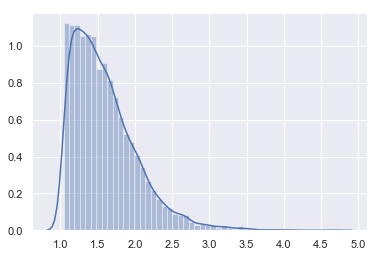

In [82]:
sns.distplot(genelog.median())

<Figure size 1440x1440 with 0 Axes>

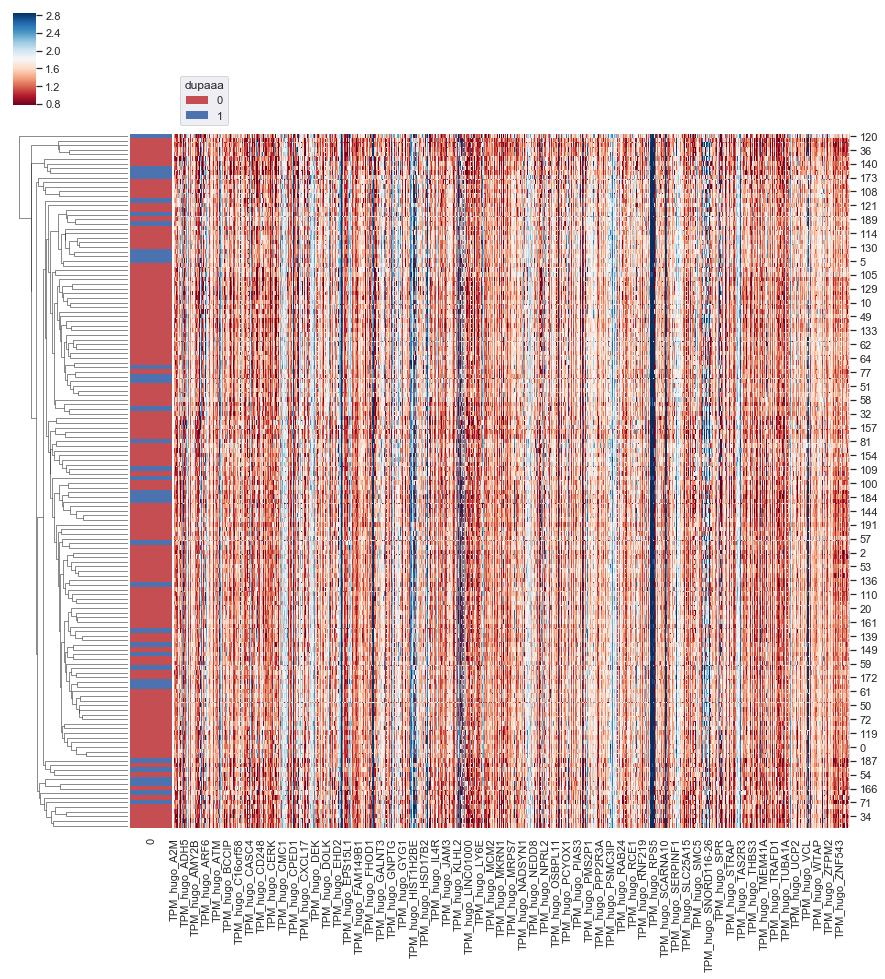

In [89]:
fig = plt.figure(figsize = (20, 20))

clusterOpttions = {
    'col_cluster' : False,
    'method' : 'average',
    'metric' : 'euclidean',
    'figsize' : (15, 15),
    'robust' : True,
    'cmap' : 'RdBu',
    'robust' : True,
}

lut = dict(zip(list(yTrain.iloc[:, 0].unique()), 'rb'))
rowCols = yTrain.iloc[:, 0].map(lut)

fig = sns.clustermap(data = genelog, **clusterOpttions, row_colors = rowCols)

for label in yTrain.iloc[:, 0].unique() :
    fig.ax_col_dendrogram.bar(0, 0, color = lut[label], label = label, linewidth = 0)
fig.ax_col_dendrogram.legend(title = 'dupaaa', loc = 3, ncol = 1)